In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

In [2]:
# Load Data
data_path = '../data/raw/credit_risk_dataset.csv'
df = pd.read_csv(data_path)
print("Data loaded successfully!")
print(f"Shape: {df.shape}")

Data loaded successfully!
Shape: (32581, 12)


## Initial Data Inspection

In [3]:
# Data Types and Info
print("Data Types:")
print(df.dtypes)
print("\nInfo:")
df.info()

Data Types:
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5 

In [4]:
# Summary Statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 165


## Univariate Analysis

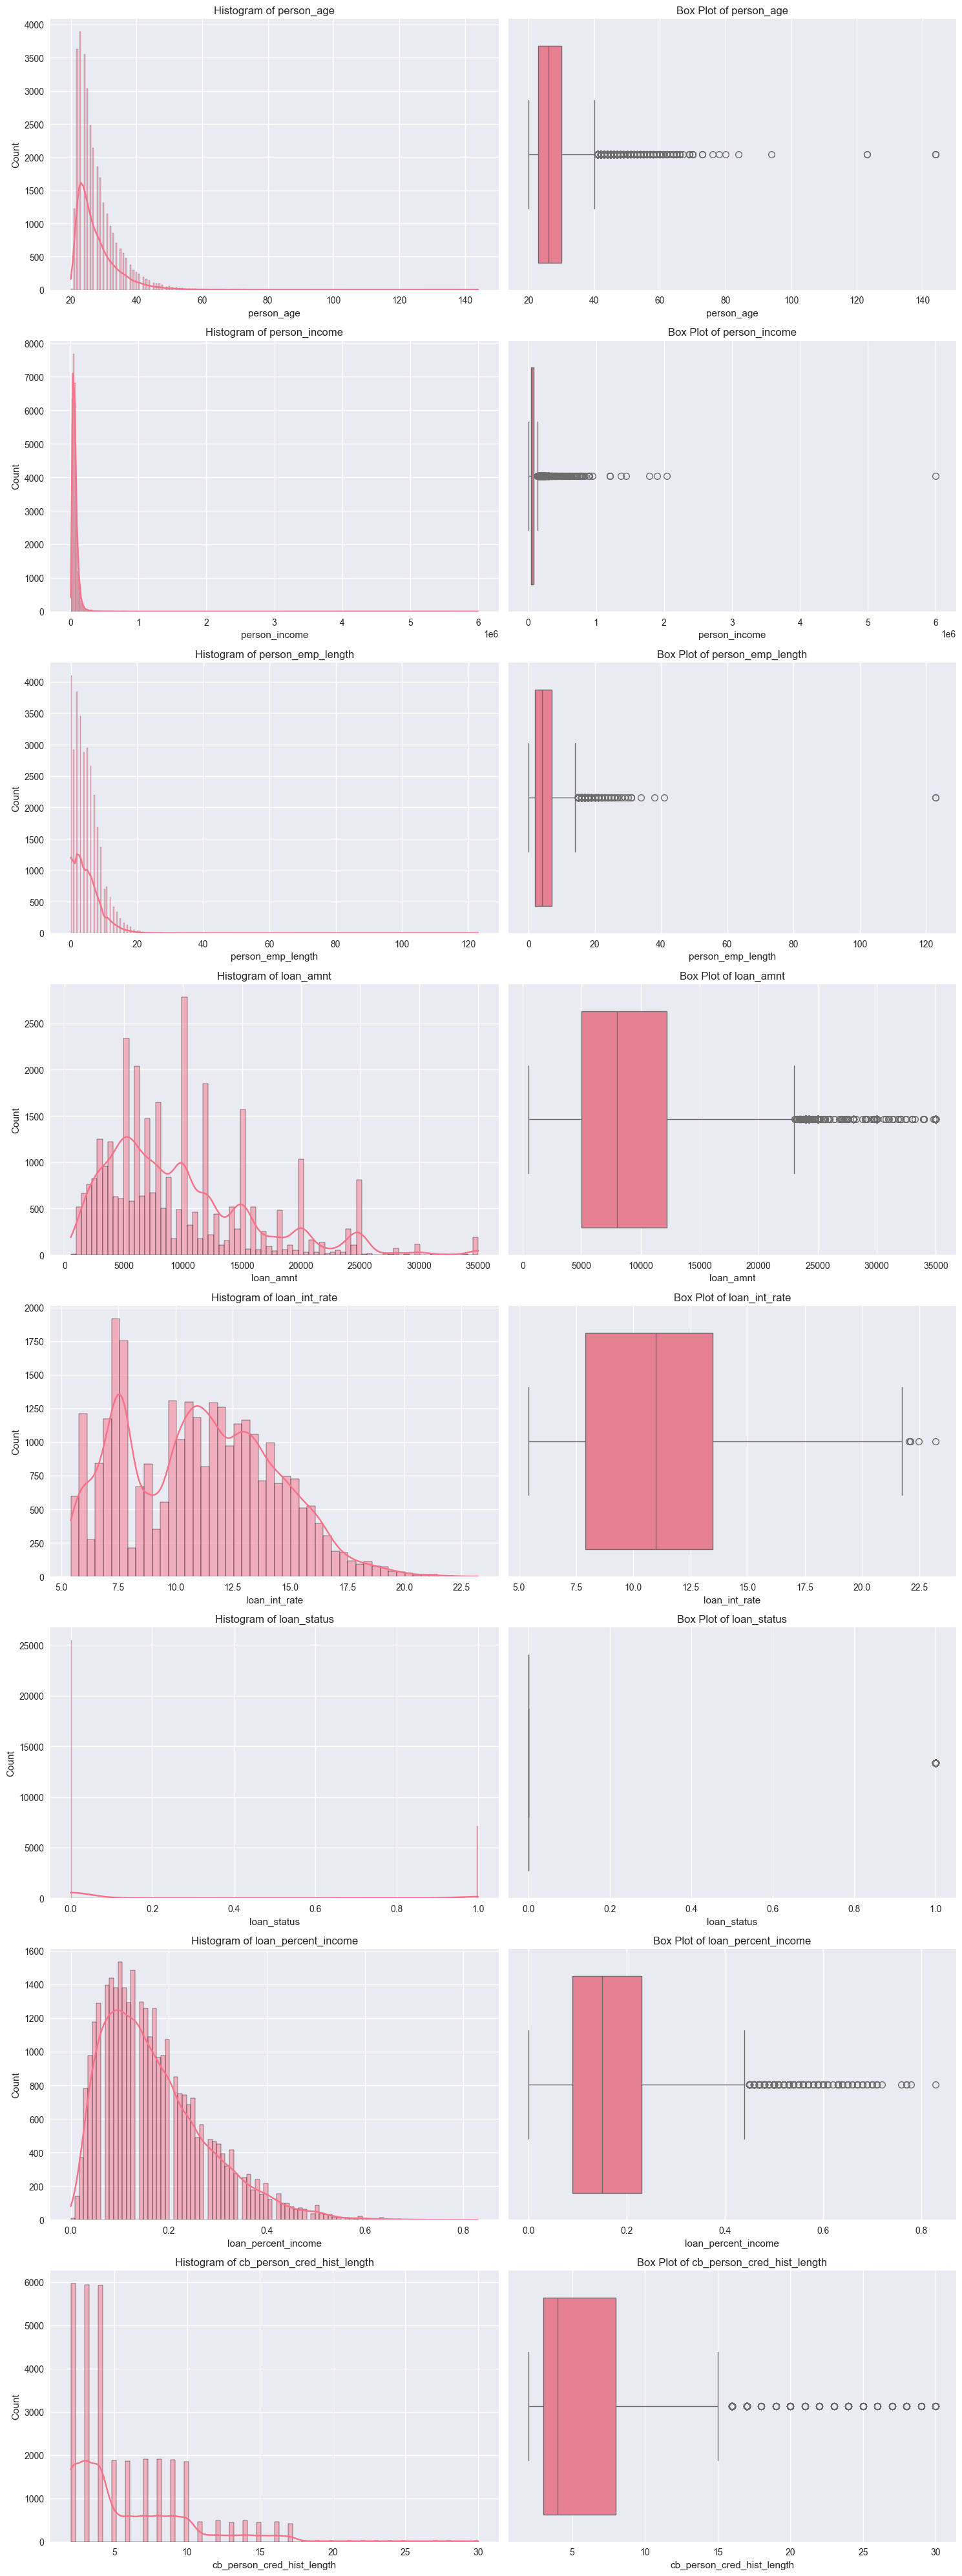

In [6]:
# Distribution of numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(15, 5*len(numerical_cols)))

for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f'Histogram of {col}')
    
    # Box plot
    sns.boxplot(x=df[col], ax=axes[i,1])
    axes[i,1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

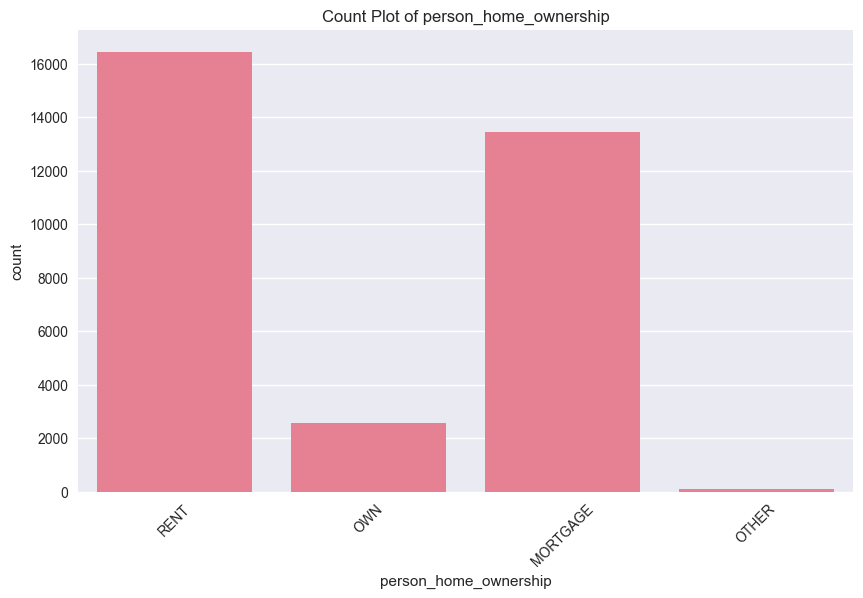

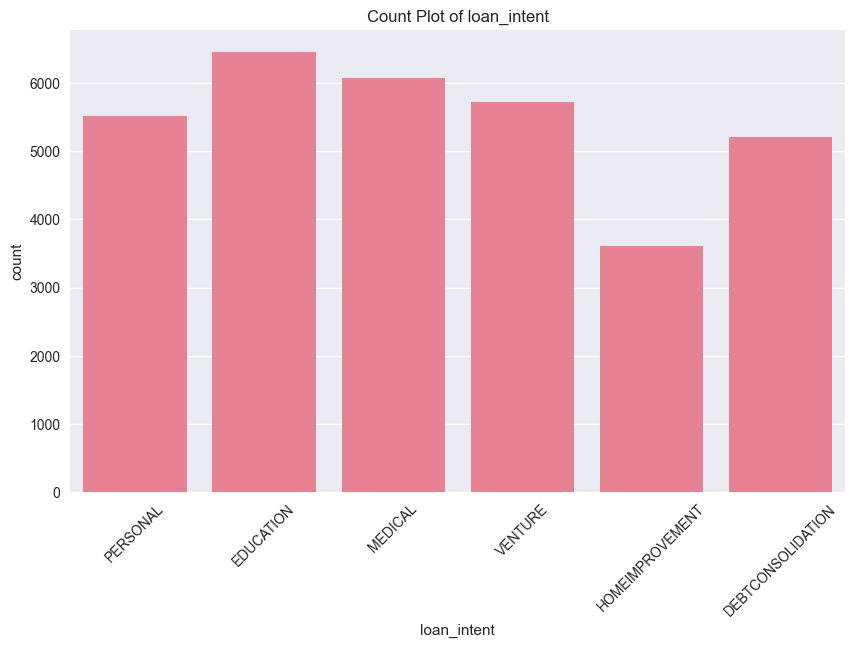

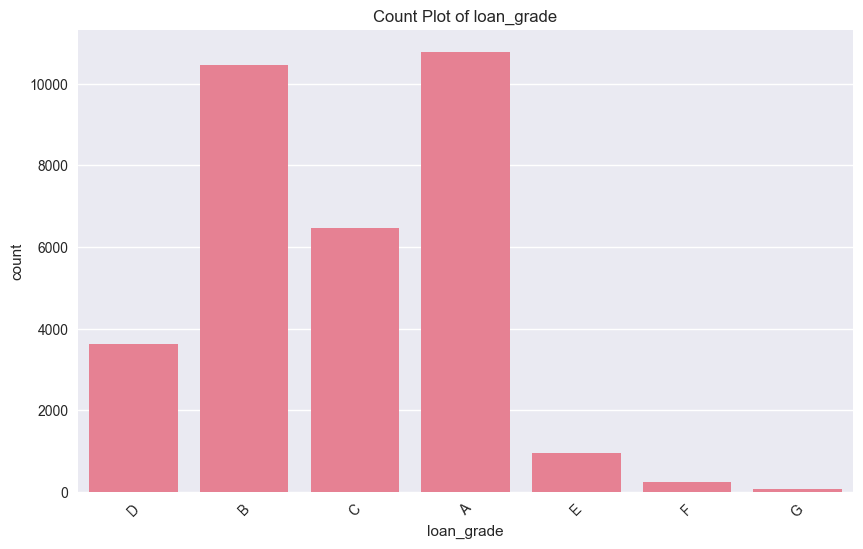

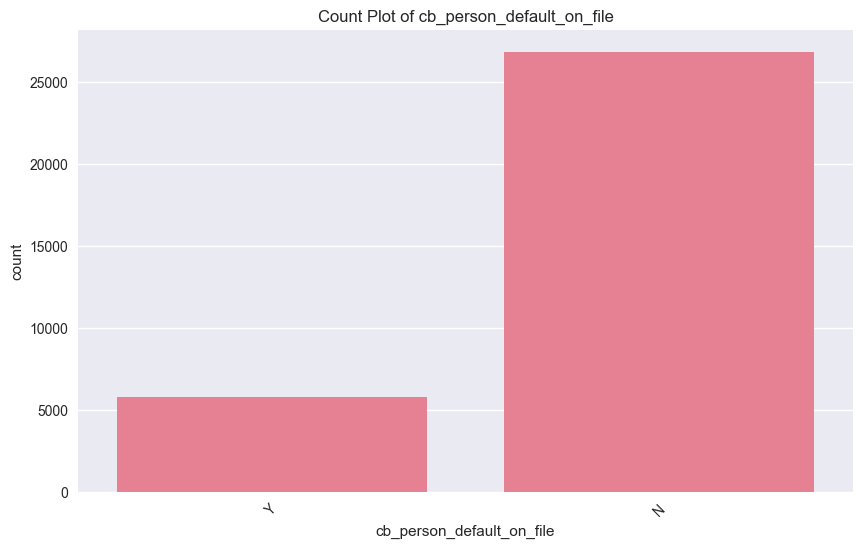

In [7]:
# Distribution of categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Bivariate Analysis

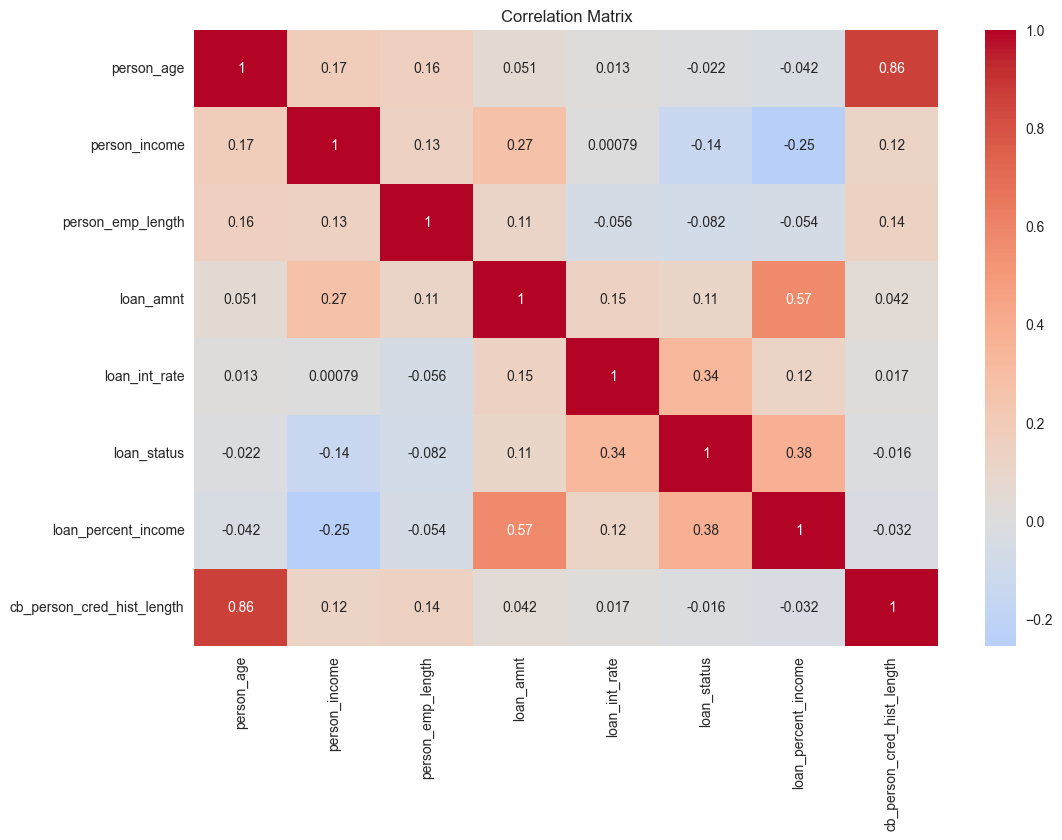

In [8]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

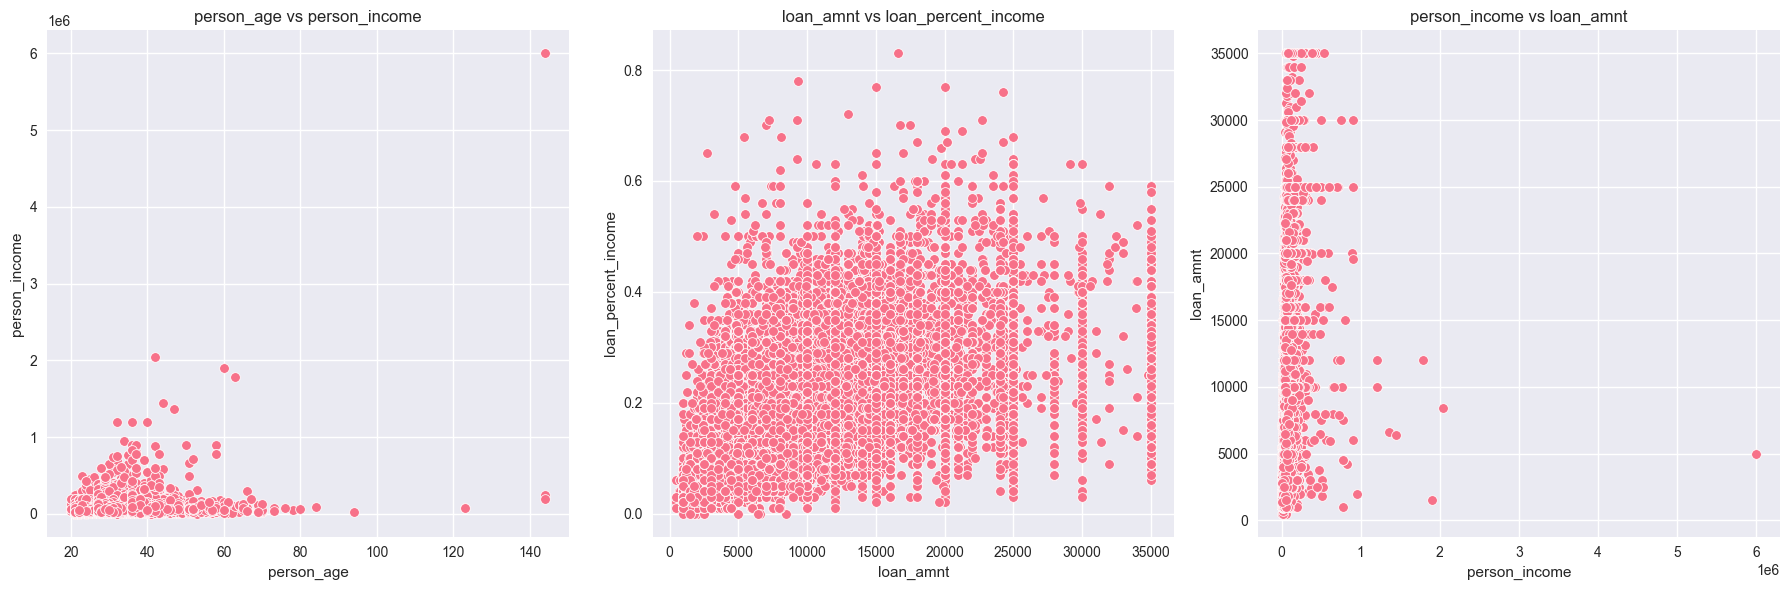

In [9]:
# Scatter plots for key relationships
key_pairs = [('person_age', 'person_income'), ('loan_amnt', 'loan_percent_income'), ('person_income', 'loan_amnt')]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (x, y) in enumerate(key_pairs):
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i])
    axes[i].set_title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

In [10]:
# Cross-tabulations for categorical vs target
for col in categorical_cols:
    print(f"\nCross-tabulation: {col} vs loan_status")
    print(pd.crosstab(df[col], df['loan_status'], normalize='index'))


Cross-tabulation: person_home_ownership vs loan_status
loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.874293  0.125707
OTHER                  0.691589  0.308411
OWN                    0.925310  0.074690
RENT                   0.684300  0.315700

Cross-tabulation: loan_intent vs loan_status
loan_status               0         1
loan_intent                          
DEBTCONSOLIDATION  0.714121  0.285879
EDUCATION          0.827832  0.172168
HOMEIMPROVEMENT    0.738974  0.261026
MEDICAL            0.732993  0.267007
PERSONAL           0.801123  0.198877
VENTURE            0.851897  0.148103

Cross-tabulation: loan_grade vs loan_status
loan_status         0         1
loan_grade                     
A            0.900436  0.099564
B            0.837240  0.162760
C            0.792660  0.207340
D            0.409542  0.590458
E            0.355809  0.644191
F            0.294606  0.705394
G            0.015625  0.984375

Cross-ta

## Multivariate Analysis

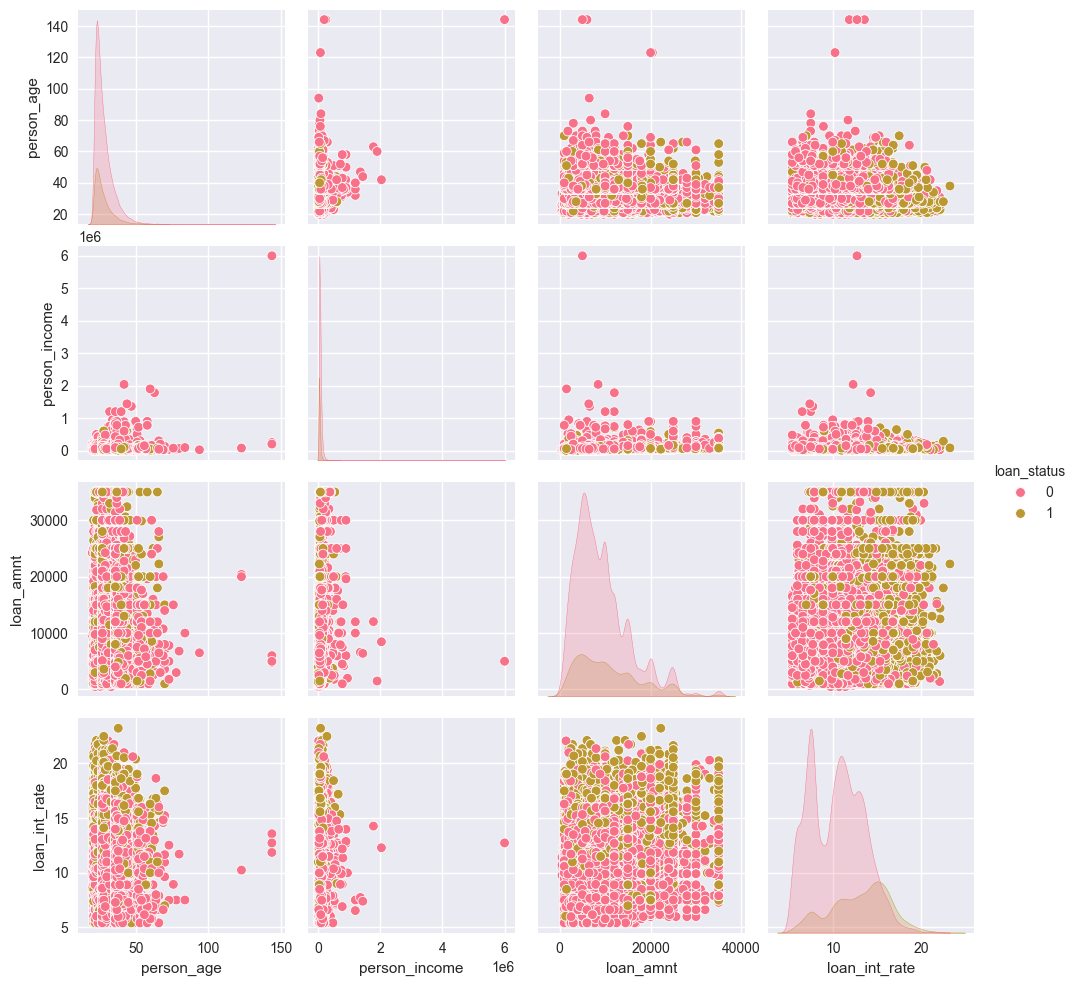

In [11]:
# Pair plot for selected features
selected_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_status']
sns.pairplot(df[selected_features], hue='loan_status', diag_kind='kde')
plt.show()

In [12]:
# 3D scatter plot
fig = px.scatter_3d(df, x='person_age', y='person_income', z='loan_amnt', color='loan_status')
fig.update_layout(title='3D Scatter Plot: Age, Income, Loan Amount')
fig.show()

## Missing Value Analysis

In [13]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_data, 'Missing %': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0])

                   Missing Count  Missing %
person_emp_length            895   2.747000
loan_int_rate               3116   9.563856


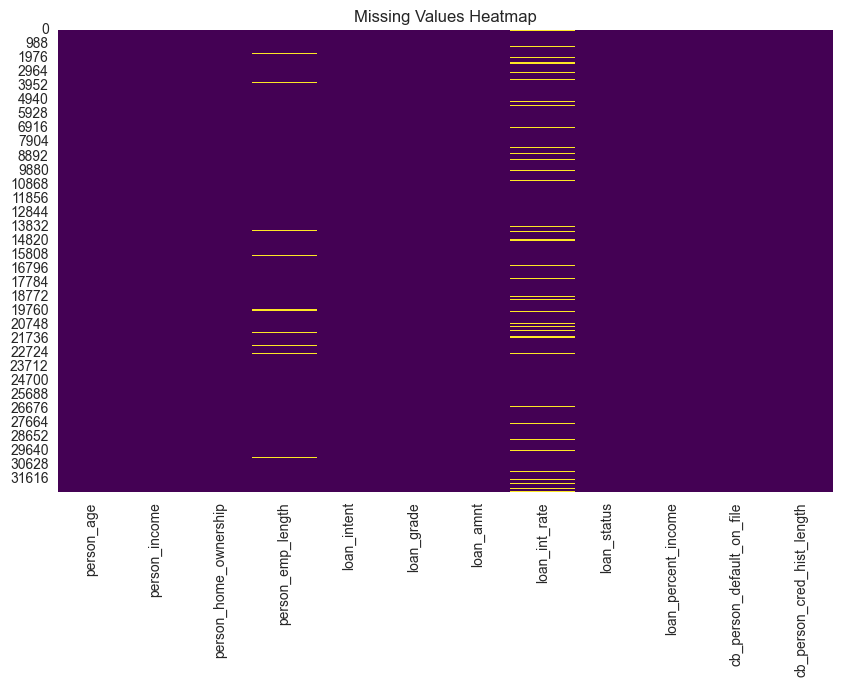

In [14]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Outlier Detection

In [15]:
# Z-score method for outlier detection
from scipy import stats

numerical_cols = df.select_dtypes(include=[np.number]).columns
outliers = {}
for col in numerical_cols:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers[col] = len(z_scores[z_scores > 3])

print("Number of outliers (Z-score > 3):")
for col, count in outliers.items():
    print(f"{col}: {count}")

Number of outliers (Z-score > 3):
person_age: 558
person_income: 233
person_emp_length: 321
loan_amnt: 337
loan_int_rate: 38
loan_status: 0
loan_percent_income: 336
cb_person_cred_hist_length: 284


In [16]:
# IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col} - Outliers by IQR: {outliers_iqr}")

person_age - Outliers by IQR: 1494
person_income - Outliers by IQR: 1484
person_emp_length - Outliers by IQR: 853
loan_amnt - Outliers by IQR: 1689
loan_int_rate - Outliers by IQR: 6
loan_status - Outliers by IQR: 7108
loan_percent_income - Outliers by IQR: 651
cb_person_cred_hist_length - Outliers by IQR: 1142


## Hypothesis Generation

In [17]:
# Example hypotheses based on initial analysis
print("Hypotheses:")
print("1. Higher loan amounts are associated with higher default rates.")
print("2. Younger applicants may have higher default risk.")
print("3. Applicants with higher income have lower default rates.")
print("4. Higher interest rates correlate with higher default probability.")
print("5. Employment length affects loan repayment ability.")

Hypotheses:
1. Higher loan amounts are associated with higher default rates.
2. Younger applicants may have higher default risk.
3. Applicants with higher income have lower default rates.
4. Higher interest rates correlate with higher default probability.
5. Employment length affects loan repayment ability.


## Key Insights

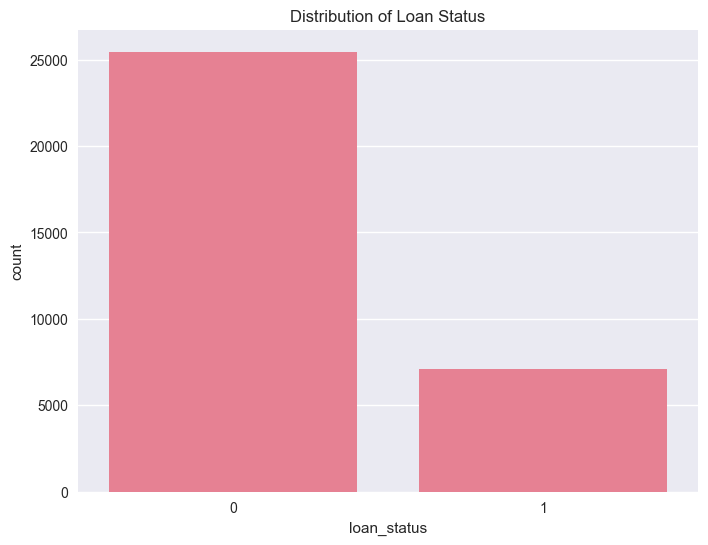

Class distribution:
loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64


In [18]:
# Target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.show()

print("Class distribution:")
print(df['loan_status'].value_counts(normalize=True))